In [1]:
#importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#loading the data 
data = pd.read_csv("https://raw.githubusercontent.com/adiag321/Data-Science-datasets/main/House%20Price%20train.csv")

In [4]:
#extracting continious variable with missing values
continous_var_na=[]

for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content) and data[label].isnull().sum()>0:
        continous_var_na.append(label)

In [6]:
# list of continous variables
continous_var_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [4]:
# Dividing the data into train test
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f063edf2d10>,
      dtype=object)

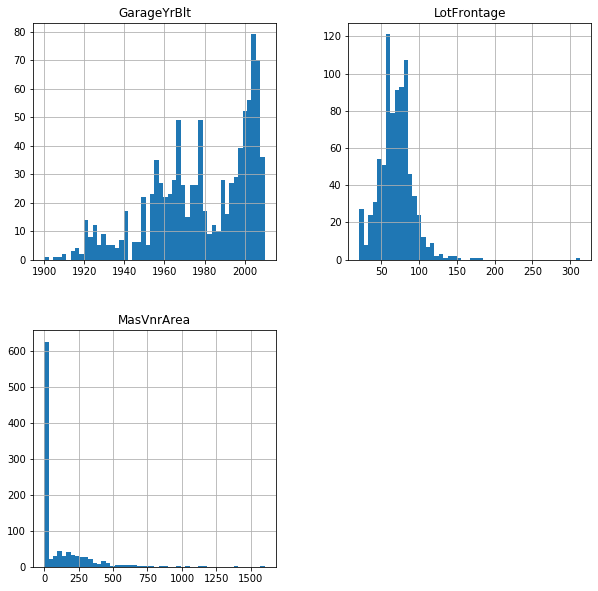

In [5]:
#creating plots
X_train[continous_var_na].hist(bins=50, figsize=(10,10))

In [6]:
#for normally distribuited variable
def normal_boundary(df, var, dist):
    
    """
    This function computes upper and lower bound of the 
    distribution
    dist/distance in case of normal distribution is 3
    """
    
    lower = df[var].mean()-dist*df[var].std()
    upper = df[var].mean()+dist*df[var].std()
    
    return lower,upper

In [7]:
#for skewed distribution
def IQR_method(df, var , dist):
    
    """
    This function computes upper and lower bound of the 
    distribution
    dist/distance in case of normal distribution is 1.5
    """
    
    
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    
    lower = df[var].quantile(0.25) - IQR*dist
    upper = df[var].quantile(0.75) + IQR*dist
    
    return lower,upper
    

In [16]:
def plotter(data, var1, var2,var3 ):
    
    """
    Takes dataframe and two variables
    v1 = variable before imputation
    v2 = newly vreated variable with imputed values
    v3 = newly created variable with imputed values
    """
    
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    
    data[var1].plot(kind='kde', ax=ax)
    
    data[var2].plot(kind='kde', ax=ax, color='orange')
    data[var3].plot(kind='kde', ax=ax, color='red')
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [17]:
#when using lowerbound value to fill
X_train["LotFrontage_lower"]=X_train["LotFrontage"].fillna(IQR_method(X_train, "LotFrontage",1.5)[0])
X_train["LotFrontage_upper"]=X_train["LotFrontage"].fillna(IQR_method(X_train, "LotFrontage",1.5)[1])

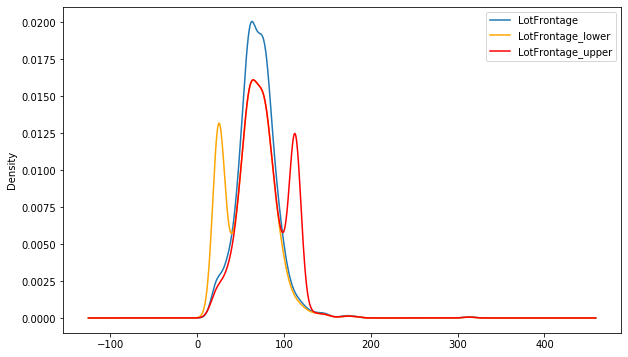

In [18]:
#lets plot
plotter(X_train, "LotFrontage", "LotFrontage_lower", "LotFrontage_upper" )

here we see that the whole distribution changes whether we apply IQR lower bound or upper bound technique

Lets check the statistical see the change in statistical property by this method

In [20]:
var =["LotFrontage", "LotFrontage_lower", "LotFrontage_upper"]

X_train[var].describe()

,LotFrontage,LotFrontage_lower,LotFrontage_upper
count,833.000000,1022.000000,1022.000000
mean,69.668667,61.408023,77.681996
std,23.077851,27.111748,26.782280
min,21.000000,21.000000,21.000000
25%,58.000000,41.000000,60.000000
50%,69.000000,62.000000,75.000000
75%,80.000000,79.000000,96.750000
max,313.000000,313.000000,313.000000
